## Análise exploratória dos dados

No primeiro momento, foi realizado uma análise exploratória dos dadaset afim de verificar possíveis inconsistências nos dados.

In [297]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [298]:
# Dados
# customer original
df_customer = pd.read_csv("dados/customer_original.csv")

# customer nps
df_nps = pd.read_csv("dados/customer_nps.csv")

# sutomer social
df_social = pd.read_csv("dados/customer_social.csv")



In [299]:
df_customer.head(15)

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,104.332.181-00
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No,960.013.389-14
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No,083.863.794-99
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No,026.542.351-14
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes,161.559.407-89
5,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No,816.184.959-50
6,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes,310.341.316-56
7,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.90,No,475.255.341-44
8,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No,928.327.648-51
9,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,117.45,5438.90,Yes,350.305.641-60


In [300]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7234 non-null   int64  
 1   PhoneService      7234 non-null   object 
 2   MultipleLines     7234 non-null   object 
 3   InternetService   7234 non-null   object 
 4   OnlineSecurity    7234 non-null   object 
 5   OnlineBackup      7234 non-null   object 
 6   DeviceProtection  7234 non-null   object 
 7   TechSupport       7234 non-null   object 
 8   StreamingTV       7234 non-null   object 
 9   StreamingMovies   7234 non-null   object 
 10  Contract          7234 non-null   object 
 11  PaperlessBilling  7234 non-null   object 
 12  PaymentMethod     7234 non-null   object 
 13  MonthlyCharges    7234 non-null   float64
 14  TotalCharges      7234 non-null   float64
 15  Churn             7234 non-null   object 
 16  cpf               7234 non-null   object 


In [301]:
print(f"Duplicatas completas: {df_customer.duplicated().sum()}")

Duplicatas completas: 168


In [302]:
df_customer.duplicated().value_counts()

False    7066
True      168
Name: count, dtype: int64

In [303]:
# Limpando os CPFs 
df_customer['cpf'] = df_customer['cpf'].str.replace(r'\D', '', regex=True)


In [304]:
# Checando duplicatas
df_customer[df_customer.duplicated(subset='cpf', keep=False)]


,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf
0,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,10433218100
1,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No,96001338914
2,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No,08386379499
3,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No,02654235114
4,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes,16155940789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,35,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.45,3029.10,Yes,71912038110
7197,30,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Electronic check,86.45,2538.05,No,87692082804
7198,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),86.45,2401.05,No,32308981334
7207,46,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),91.30,4126.35,No,33720948404


Foram identificados valores duplicados de CPF que foram posteriormente removidos

In [305]:
#cpfs_repetidos = df_customer['cpf'][df_customer['cpf'].duplicated()].unique()#
#print(cpfs_repetidos)

In [306]:
df_customer=df_customer.drop_duplicates(subset='cpf', keep='first')
#df_customer[df_customer.duplicated(subset='cpf', keep=False)]

df_customer.duplicated().value_counts()

False    7065
Name: count, dtype: int64

In [307]:
# Verificando NAs
df_customer[df_customer.isna().any(axis=1)]
# Resultados sem NAs

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cpf


In [308]:
df_nps.duplicated().value_counts()

False    7065
True      169
Name: count, dtype: int64

In [309]:
df_social.duplicated().value_counts()

False    7065
True      169
Name: count, dtype: int64

In [310]:
df_nps=df_nps.drop_duplicates(subset='cpf', keep='first')
df_nps.duplicated().value_counts()

False    7065
Name: count, dtype: int64

In [311]:
df_social=df_social.drop_duplicates(subset='cpf', keep='first')
df_social.duplicated().value_counts()


False    7065
Name: count, dtype: int64

In [312]:
#assert df_customer['cpf'].equals(df_nps['cpf']) and df_customer['cpf'].equals(df_social['cpf']), "CPFs não estão na mesma ordem!"

In [313]:
for df in [df_customer, df_nps, df_social]:
    df['cpf'] = (
        df['cpf']
        .astype(str)              
        .str.replace(r'\.|\-| ', '', regex=True)  
        .str.zfill(11)            
    )

In [314]:
#df_nps.info()
#df_customer.info()
#df_social.info()

Os três bancos de dados foram unidos, usando o CPf com chave primária

In [315]:
# Juntando os bancos de dados
df_temp = pd.merge(df_customer, df_nps, on='cpf', how='inner')
df_final = pd.merge(df_temp, df_social, on='cpf', how='inner')
#df_final.head(25)

In [316]:
df_final.duplicated().value_counts()
#df_final.to_csv("datasets_unidos.csv", index=False, encoding="utf-8")

False    7065
Name: count, dtype: int64

In [317]:
# Contagem dos CPFs para verificar se os valores são únicos
df_final['cpf'].value_counts()

cpf
20410372883    1
10433218100    1
96001338914    1
08386379499    1
02654235114    1
              ..
26916697857    1
53287101269    1
23884969692    1
39537672409    1
35030564160    1
Name: count, Length: 7065, dtype: int64

Foram identificados valores altos (outliers) nas variávei **TotalCharges** e **MonthlyCharges**, que foram removidos. Vale ressaltar que estes valores foram removidos apenas por critério de magnitude, seria necessário avaliar melhor o contexto dos contratos dos CFPs envolvidos.

<Axes: xlabel='TotalCharges'>

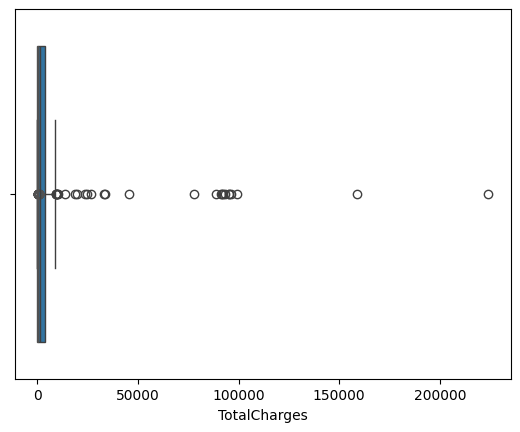

In [318]:
sns.boxplot(data=df_final, x='TotalCharges')
sns.boxplot(data = df_final, x = 'MonthlyCharges')

In [319]:
# remoção dos outliers

colunas_numericas = ['TotalCharges', 'MonthlyCharges']

df_limpo = df_final.copy()

for coluna in colunas_numericas:
    Q3 = df_limpo[coluna].quantile(0.75)
    limite_superior = Q3 + 1.5 * (Q3 - df_limpo[coluna].quantile(0.25))
    df_limpo = df_limpo[df_limpo[coluna] <= limite_superior]

df_limpo[colunas_numericas].describe()

df_limpo.describe()





,tenure,MonthlyCharges,TotalCharges,NPS,SeniorCitizen
count,7034.000000,7034.000000,7034.000000,7034.000000,7034.000000
mean,32.414558,64.807229,2282.828874,7.154677,0.162354
std,24.545564,30.086461,2266.625162,2.649100,0.368802
min,1.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.612500,401.350000,5.000000,0.000000
50%,29.000000,70.350000,1397.100000,8.000000,0.000000
75%,55.000000,89.900000,3793.775000,9.000000,0.000000
max,72.000000,118.750000,8684.800000,10.000000,1.000000


In [320]:
df_limpo['churn_bin'] = df_limpo['Churn'].map({'Yes':1, 'No':0})

servicos = [
    'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_limpo['TotalServicosContratados'] = df_limpo[servicos].apply(
    lambda x: sum(x == 'Yes'), axis = 1
)

# Na tabelas df_limpo.discribe(), há total de serviços contratados com valores 0, o que indica possível  inconsistência nos dados, então
#decidir remover todos os CPFs com zero serviços contratados, ao todo foram 80 observações.
df_limpo = df_limpo[df_limpo['TotalServicosContratados'] > 0]
#print(df_limpo[['cpf', 'TotalServicosContratados']].head())

df_limpo['TotalServicosContratados'].isna().value_counts()

# Também foram removidos NPS com valores iguais a zero, visto que a escala é de 1-10
df_limpo = df_limpo[df_limpo['NPS'] > 0]

In [321]:
df = df.dropna().reset_index(drop=True)


In [322]:
df_limpo.describe()


,tenure,MonthlyCharges,TotalCharges,NPS,SeniorCitizen,churn_bin,TotalServicosContratados
count,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000,6945.000000
mean,32.723830,65.232527,2309.164910,7.193233,0.161411,0.263067,3.401872
std,24.515208,29.954747,2268.810826,2.631471,0.367936,0.440330,2.042794
min,1.000000,18.250000,18.800000,1.000000,0.000000,0.000000,1.000000
25%,9.000000,39.450000,417.700000,5.000000,0.000000,0.000000,2.000000
50%,29.000000,70.600000,1423.150000,8.000000,0.000000,0.000000,3.000000
75%,56.000000,90.000000,3842.600000,9.000000,0.000000,1.000000,5.000000
max,72.000000,118.750000,8684.800000,10.000000,1.000000,1.000000,8.000000


## Análise Descritiva

Nesta sessão será feita a análise descritiva para as variáveis **Churn** e **NPS**

### Análise descritiva para variável Churn

Com a atual base de dados, em que foram feitas suas devidas limpezas e ajustes. Foi identificado um **Churn** de aproximadamente 26%

In [323]:
# Quantidade de Churn
df_limpo[["Churn"]].value_counts(normalize=True)*100

Churn
No       73.693305
Yes      26.306695
Name: proportion, dtype: float64

Em um primeiro momento, buscou-se avaliar o Churn pela quantidade de serviços contratados, com o objetivo de averiguar se a quantidade de serviços contratados iria influenciar no **Churn**.

In [324]:
tabela_churn = pd.crosstab(
    df_limpo['TotalServicosContratados'],
    df_limpo['churn_bin'],
    margins=True,
    margins_name="Total"
)

tabela_churn['% Churn'] = (tabela_churn[1] / tabela_churn['Total'] * 100).round(1)
#tabela_churn['% Fidelidade'] = (tabela_churn[0] / tabela_churn['Total'] * 100).round(1)

tabela_churn = tabela_churn.rename(columns={
    0: 'Não Churn',
    1: 'Churn'
})

print("Relação entre Quantidade de Serviços e Churn:")
print(tabela_churn.to_string())

Relação entre Quantidade de Serviços e Churn:
churn_bin                 Não Churn  Churn  Total  % Churn
TotalServicosContratados                                  
1                              1338    359   1697     21.2
2                               796    389   1185     32.8
3                               612    352    964     36.5
4                               633    283    916     30.9
5                               674    232    906     25.6
6                               522    152    674     22.6
7                               346     49    395     12.4
8                               197     11    208      5.3
Total                          5118   1827   6945     26.3


Nota-se que com aumento de serviços contratados, o **Churn** diminui, logo podemos pensar em uma estratégia de vendas de pacotes de serviços.

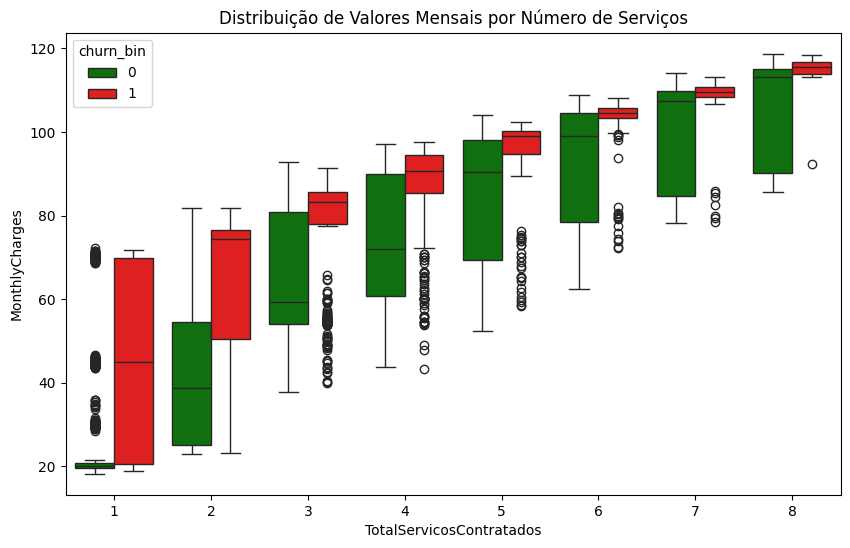

In [325]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_limpo,
    x='TotalServicosContratados',
    y='MonthlyCharges',
    hue='churn_bin',
    palette={0: 'green', 1: 'red'}
)
plt.title('Distribuição de Valores Mensais por Número de Serviços')
plt.show()

In [326]:
var_num  = df_limpo.select_dtypes(include=['int64']).columns.tolist()
var_num = [col for col in var_num if col not in ['churn_bin', 'TotalServicosContratados']] 

In [327]:
def calculate_churn_rate(df, column):
    return (df.groupby(column)['churn_bin']
            .mean()
            .mul(100)
            .round(2)
            .reset_index()
            .rename(columns={'churn_bin': 'Churn'}))

for col in var_num:
    print(f"\n**Churn Rate para {col}:**")
    churn_df = calculate_churn_rate(df_limpo, col)
    display(churn_df)
    
    max_churn = churn_df.loc[churn_df['Churn'].idxmax()]
    print(f"-> Maior Churn: '{max_churn[col]}' com {max_churn['Churn']}%")


**Churn Rate para tenure:**


,tenure,Churn
0,1,61.83
1,2,51.53
2,3,46.11
3,4,46.51
4,5,48.46
...,...,...
67,68,9.00
68,69,8.42
69,70,9.24
70,71,3.53


-> Maior Churn: '1.0' com 61.83%

**Churn Rate para NPS:**


,NPS,Churn
0,1,86.82
1,2,74.70
2,3,66.17
3,4,55.24
4,5,45.34
5,6,34.51
6,7,28.68
7,8,19.14
8,9,7.74
9,10,2.24


-> Maior Churn: '1.0' com 86.82%

**Churn Rate para SeniorCitizen:**


,SeniorCitizen,Churn
0,0,23.51
1,1,40.86


-> Maior Churn: '1.0' com 40.86%


Podemos notar que o Churn diminui de acordo com aumento de permanencia do individuo com o contrato de serviços (medido na variável **tenure**). Para fins práticos a variável será categorizada para entender melhor os períodos mais propensos ao cancelamento. 

In [328]:
bins = [1, 6, 12, 24, 48, 60, float('inf')]  
labels = [
    '1-6m',   
    '7-12m', 
    '13-24m', 
    '25-48m', 
    '49-60m', 
    '60m+'
]

df_limpo['tenure_cat'] = pd.cut(
    df_limpo['tenure'],
    bins=bins,
    labels=labels,
    right=False
)

print("\nDistribuição por categoria:")
print(df_limpo['tenure_cat'].value_counts().sort_index())


Distribuição por categoria:
tenure_cat
1-6m      1303
7-12m      689
13-24m    1035
25-48m    1616
49-60m     819
60m+      1483
Name: count, dtype: int64


In [329]:
#  tabela resumo
tabela_simples = (df_limpo.groupby('tenure_cat')['churn_bin']
                  .agg(['count', 'mean'])
                  .rename(columns={
                      'count': 'Total Clientes',
                      'mean': 'Taxa Churn'
                  }))

tabela_simples['Taxa Churn'] = (tabela_simples['Taxa Churn'] * 100).round(1).astype(str) + '%'

print("Taxa de Churn por Tempo de Permanência:")
print(tabela_simples)

Taxa de Churn por Tempo de Permanência:
            Total Clientes Taxa Churn
tenure_cat                           
1-6m                  1303      54.3%
7-12m                  689      36.6%
13-24m                1035      29.7%
25-48m                1616      20.9%
49-60m                 819      15.0%
60m+                  1483       6.7%


/tmp/ipykernel_1461/2232545065.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_simples = (df_limpo.groupby('tenure_cat')['churn_bin']


/tmp/ipykernel_1461/2783234646.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_1461/2783234646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


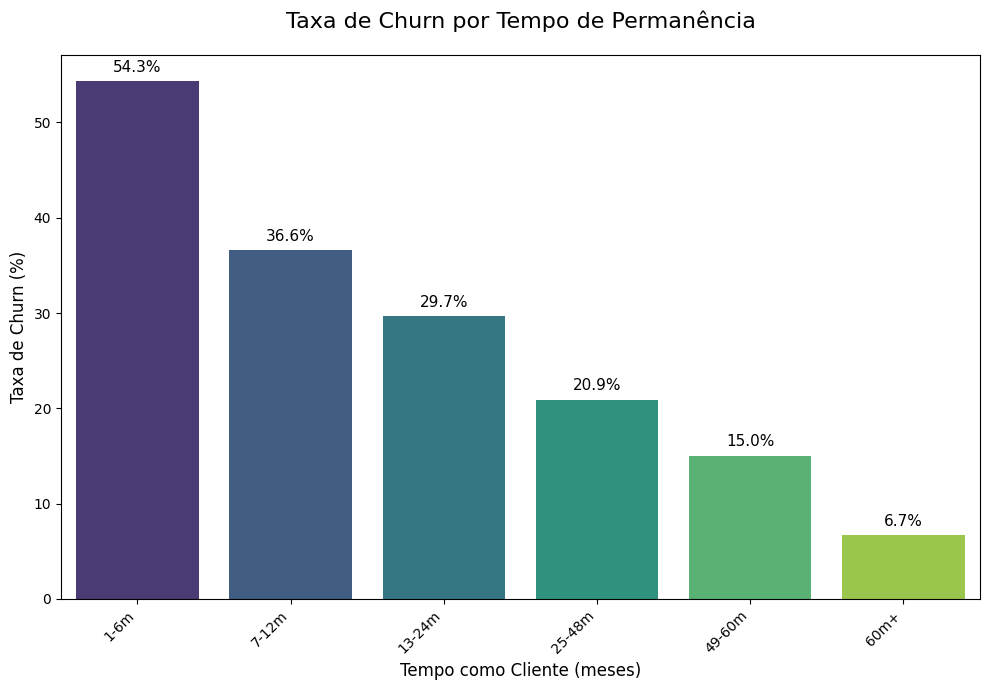

In [330]:
plt.figure(figsize=(10, 7))

ax = sns.barplot(
    data=df_limpo,
    x='tenure_cat',
    y='churn_bin',
    estimator=lambda x: sum(x) / len(x) * 100,
    ci=None,
    palette='viridis',  
    order=['1-6m', '7-12m', '13-24m', '25-48m', '49-60m', '60m+']
)

plt.title('Taxa de Churn por Tempo de Permanência', fontsize=16, pad=20)
plt.xlabel('Tempo como Cliente (meses)', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)

ax.grid(False) 

for spine in ax.spines.values():
    spine.set_visible(True)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=11
    )

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Com é possível observar no gráfico acima, nota-se que a maior porcentagem de Churn, se concetra nos primeiros seis meses de contrato até  um ano. Decaíndo até 7%, aproximadamente, para mais de cinco anos de contrato.

Foi avaliado as variáveis contínuas **Total Charges** e **Monthly Charges**. Podemos notar que para o **Churn (Yes)**, se concetra no Monthly Charges no valores de 70 e 110. 

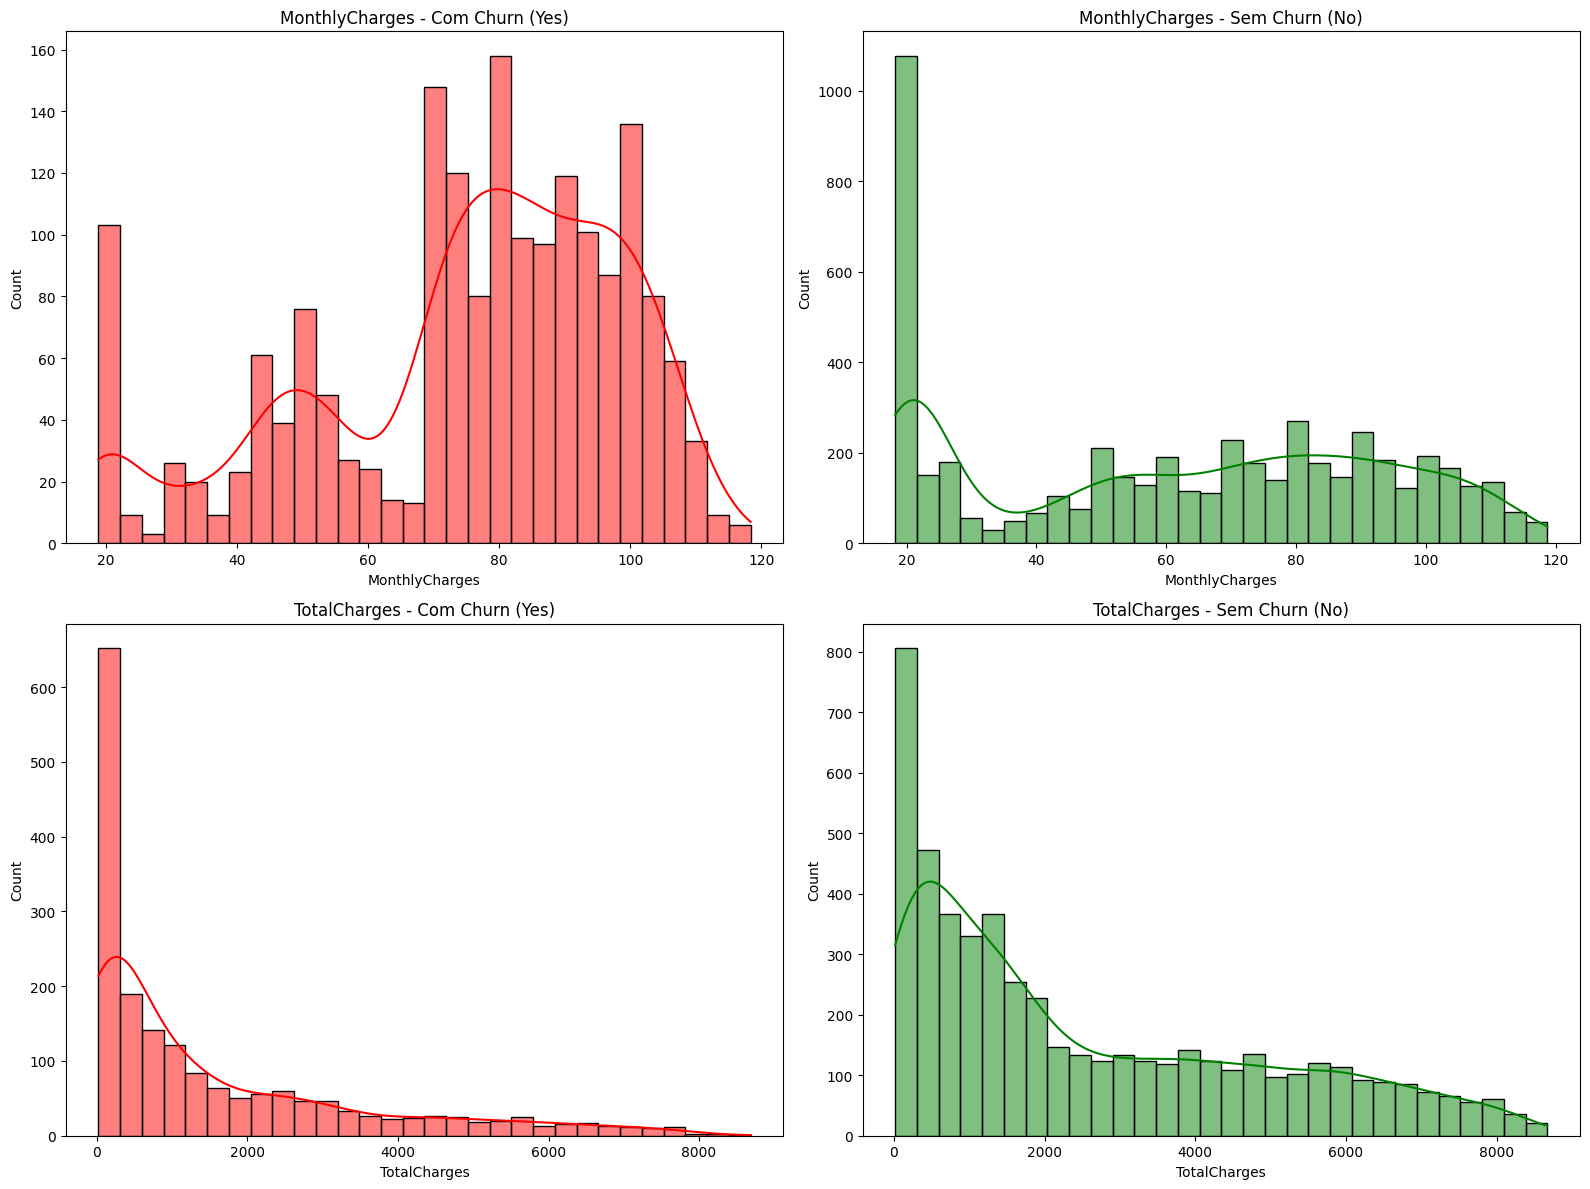

In [331]:
plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.histplot(data=df_limpo[df_limpo['Churn'] == 'Yes'], 
             x='MonthlyCharges', color='red', bins=30, kde=True)
plt.title('MonthlyCharges - Com Churn (Yes)')

plt.subplot(2, 2, 2)
sns.histplot(data=df_limpo[df_limpo['Churn'] == 'No'], 
             x='MonthlyCharges', color='green', bins=30, kde=True)
plt.title('MonthlyCharges - Sem Churn (No)')

plt.subplot(2, 2, 3)
sns.histplot(data=df_limpo[df_limpo['Churn'] == 'Yes'], 
             x='TotalCharges', color='red', bins=30, kde=True)
plt.title('TotalCharges - Com Churn (Yes)')

plt.subplot(2, 2, 4)
sns.histplot(data=df_limpo[df_limpo['Churn'] == 'No'], 
             x='TotalCharges', color='green', bins=30, kde=True)
plt.title('TotalCharges - Sem Churn (No)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1461/2284436847.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y='MonthlyCharges',
/tmp/ipykernel_1461/2284436847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y='TotalCharges',


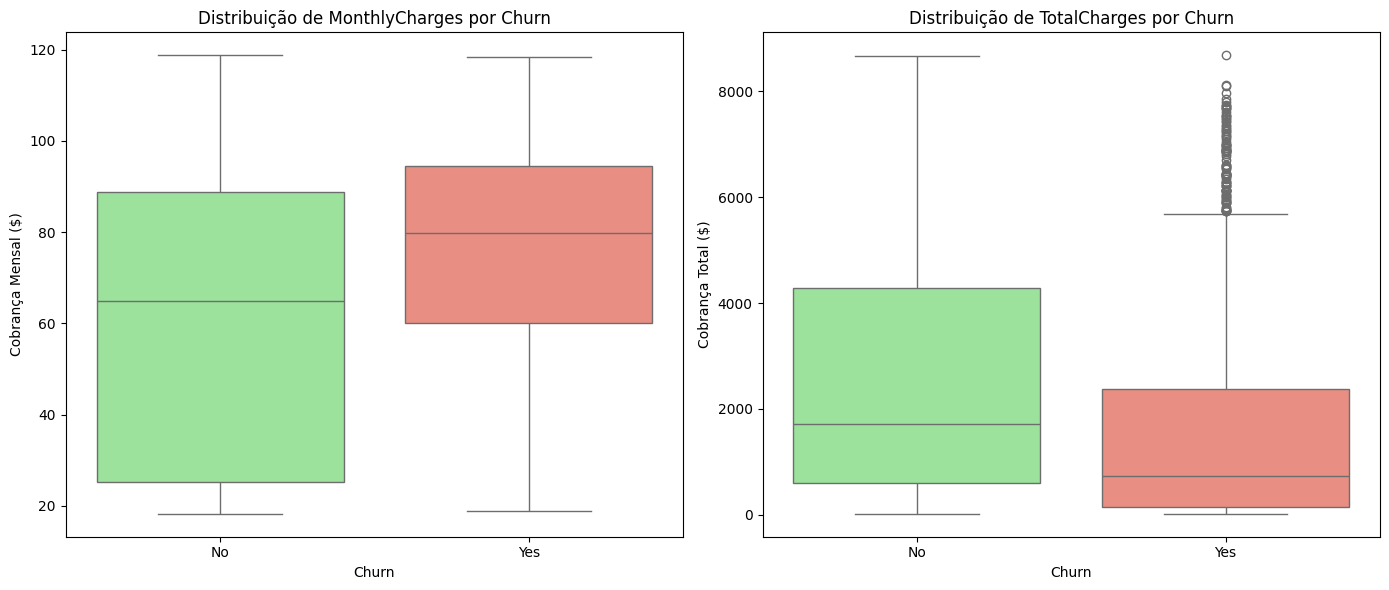

In [332]:
plt.figure(figsize=(14, 6))

# MonthlyCharges
plt.subplot(1, 2, 1)
sns.boxplot(data=df_limpo, x='Churn', y='MonthlyCharges', 
            palette={'Yes': 'salmon', 'No': 'lightgreen'})
plt.title('Distribuição de MonthlyCharges por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal ($)')

# TotalCharges
plt.subplot(1, 2, 2)
sns.boxplot(data=df_limpo, x='Churn', y='TotalCharges', 
            palette={'Yes': 'salmon', 'No': 'lightgreen'})
plt.title('Distribuição de TotalCharges por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Total ($)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_1461/1822097320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='Churn', y='tenure',


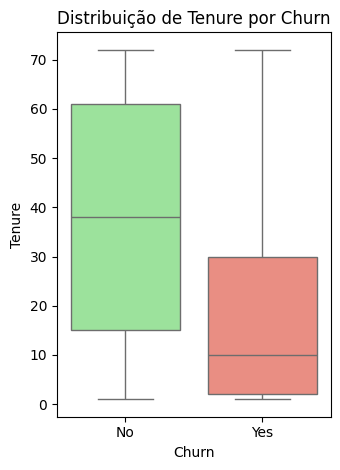

In [333]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df_limpo, x='Churn', y='tenure', 
            palette={'Yes': 'salmon', 'No': 'lightgreen'})
plt.title('Distribuição de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.tight_layout()
plt.show()

Análise para as variáveis categóricas

In [334]:
cat_cols = df_limpo.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['Churn', 'cpf']] 

In [335]:
def calculate_churn_rate(df, column):
    return (df.groupby(column)['churn_bin']
            .mean()
            .mul(100)
            .round(2)
            .reset_index()
            .rename(columns={'churn_bin': 'Churn'}))

for col in cat_cols:
    print(f"\n**Churn Rate para {col}:**")
    churn_df = calculate_churn_rate(df_limpo, col)
    display(churn_df)
    
    max_churn = churn_df.loc[churn_df['Churn'].idxmax()]
    print(f"-> Maior Churn: '{max_churn[col]}' com {max_churn['Churn']}%")


**Churn Rate para PhoneService:**


,PhoneService,Churn
0,No,22.50
1,Yes,26.67


-> Maior Churn: 'Yes' com 26.67%

**Churn Rate para MultipleLines:**


,MultipleLines,Churn
0,No,25.07
1,No phone service,22.50
2,Yes,28.49


-> Maior Churn: 'Yes' com 28.49%

**Churn Rate para InternetService:**


,InternetService,Churn
0,DSL,18.15
1,Fiber optic,41.76
2,No,7.43


-> Maior Churn: 'Fiber optic' com 41.76%

**Churn Rate para OnlineSecurity:**


,OnlineSecurity,Churn
0,No,41.61
1,No internet service,7.43
2,Yes,14.64


-> Maior Churn: 'No' com 41.61%

**Churn Rate para OnlineBackup:**


,OnlineBackup,Churn
0,No,39.68
1,No internet service,7.43
2,Yes,21.60


-> Maior Churn: 'No' com 39.68%

**Churn Rate para DeviceProtection:**


,DeviceProtection,Churn
0,No,38.92
1,No internet service,7.43
2,Yes,22.48


-> Maior Churn: 'No' com 38.92%

**Churn Rate para TechSupport:**


,TechSupport,Churn
0,No,41.49
1,No internet service,7.43
2,Yes,15.19


-> Maior Churn: 'No' com 41.49%

**Churn Rate para StreamingTV:**


,StreamingTV,Churn
0,No,33.20
1,No internet service,7.43
2,Yes,29.97


-> Maior Churn: 'No' com 33.2%

**Churn Rate para StreamingMovies:**


,StreamingMovies,Churn
0,No,33.41
1,No internet service,7.43
2,Yes,29.80


-> Maior Churn: 'No' com 33.41%

**Churn Rate para Contract:**


,Contract,Churn
0,Month-to-month,42.55
1,One year,11.25
2,Two year,2.85


-> Maior Churn: 'Month-to-month' com 42.55%

**Churn Rate para PaperlessBilling:**


,PaperlessBilling,Churn
0,No,16.12
1,Yes,33.31


-> Maior Churn: 'Yes' com 33.31%

**Churn Rate para PaymentMethod:**


,PaymentMethod,Churn
0,Bank transfer (automatic),16.63
1,Credit card (automatic),15.29
2,Electronic check,44.88
3,Mailed check,18.90


-> Maior Churn: 'Electronic check' com 44.88%

**Churn Rate para gender:**


,gender,Churn
0,Female,26.67
1,Male,25.95


-> Maior Churn: 'Female' com 26.67%

**Churn Rate para Partner:**


,Partner,Churn
0,No,32.67
1,Yes,19.57


-> Maior Churn: 'No' com 32.67%

**Churn Rate para Dependents:**


,Dependents,Churn
0,No,30.94
1,Yes,15.50


-> Maior Churn: 'No' com 30.94%


Escrever aqui depois


In [336]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

In [337]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6945 entries, 0 to 7036
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   tenure                    6945 non-null   int64   
 1   PhoneService              6945 non-null   object  
 2   MultipleLines             6945 non-null   object  
 3   InternetService           6945 non-null   object  
 4   OnlineSecurity            6945 non-null   object  
 5   OnlineBackup              6945 non-null   object  
 6   DeviceProtection          6945 non-null   object  
 7   TechSupport               6945 non-null   object  
 8   StreamingTV               6945 non-null   object  
 9   StreamingMovies           6945 non-null   object  
 10  Contract                  6945 non-null   object  
 11  PaperlessBilling          6945 non-null   object  
 12  PaymentMethod             6945 non-null   object  
 13  MonthlyCharges            6945 non-null   float64 
 1

In [338]:

print(df_limpo.isnull().sum())

tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
Churn                       0
cpf                         0
NPS                         0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
churn_bin                   0
TotalServicosContratados    0
tenure_cat                  0
dtype: int64


In [339]:
print(df_limpo.isnull().sum())


tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
Churn                       0
cpf                         0
NPS                         0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
churn_bin                   0
TotalServicosContratados    0
tenure_cat                  0
dtype: int64


In [340]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# seu DataFrame:
df = df_limpo.copy()

# colunas usadas no perfil agregado
num_cols = [c for c in [
    "tenure", "MonthlyCharges", "TotalCharges",
    "TotalServicosContratados", "SeniorCitizen", "NPS"
] if c in df.columns]

drop_cols = ["cpf", "Churn", "churn_bin"]  # 'churn_bin' volta depois
use_cols = [c for c in df.columns if c not in drop_cols]

# categóricas = object/category que não estão nas numéricas
cat_cols = [c for c in use_cols
            if (df[c].dtype.name in ["object","category"]) and (c not in num_cols)]

# OneHot compatível com qualquer versão do sklearn
def make_ohe():
    try:
        return OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse=False)

ohe = make_ohe()
scaler = StandardScaler(with_mean=True, with_std=True)

preproc = ColumnTransformer(
    transformers=[
        ("num", scaler, [c for c in num_cols if c in df.columns]),
        ("cat", ohe,  [c for c in cat_cols if c in df.columns]),
    ],
    remainder="drop"
)

In [341]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

RANDOM_STATE = 42

pca = PCA(n_components=0.95, random_state=RANDOM_STATE)
pipe_pca = Pipeline(steps=[
    ("preprocessor", preproc),
    ("pca", pca),
])

# matriz de componentes para clusterização
X_pca = pipe_pca.fit_transform(df[use_cols])


In [342]:
# Seleciona melhor k via silhouette (2..8)
best_k, best_score = None, -1
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=20, random_state=RANDOM_STATE)
    labels = km.fit_predict(X_pca)
    sc = silhouette_score(X_pca, labels)
    if sc > best_score:
        best_k, best_score = k, sc

print(f"Melhor k (silhouette): {best_k} | score={best_score:.3f}")

kmeans = KMeans(n_clusters=best_k, n_init=20, random_state=RANDOM_STATE)
clusters = kmeans.fit_predict(X_pca)

df_clusters = df.copy()
df_clusters["cluster"] = clusters

# Churn rate por cluster + tamanho
perfil_clusters = (
    df_clusters.groupby("cluster")
    .agg(
        n=("cluster", "size"),
        churn_rate=("churn_bin", "mean"),
        tenure_med=("tenure", "mean"),
        mensalidade_med=("MonthlyCharges", "mean"),
        totalcharges_med=("TotalCharges", "mean"),
        servicos_med=("TotalServicosContratados", "mean"),
        nps_med=("NPS", "mean"),
    )
    .assign(churn_rate=lambda d: (d["churn_rate"] * 100).round(2))
    .sort_values("churn_rate", ascending=False)
)

print("\n== Perfil por cluster (ordenado por churn rate) ==")
display(perfil_clusters)

# Principais categorias por cluster (lift relativo ao total)
def top_categorias_cluster(df_base, cat_cols, cluster_id, top=8):
    dfc = df_base[df_base["cluster"] == cluster_id]
    out = []
    total = len(df_base)
    for c in cat_cols:
        for lvl, cnt in dfc[c].value_counts(dropna=False).items():
            p_cluster = cnt / len(dfc)
            p_total = (df_base[c] == lvl).mean()
            if p_total > 0:
                lift = p_cluster / p_total
                out.append((c, str(lvl), cnt, p_cluster, p_total, lift))
    out = pd.DataFrame(out, columns=["variavel", "nivel", "freq_cluster", "p_cluster", "p_total", "lift"])
    out["lift"] = out["lift"].round(3)
    return out.sort_values("lift", ascending=False).head(top)

# Exemplo: categorias com maior lift no cluster de maior churn
cluster_top = perfil_clusters.index[0]
print(f"\nTop categorias (lift) no cluster mais propenso ao churn = {cluster_top}")
display(top_categorias_cluster(df_clusters, cat_cols, cluster_top, top=12))


Melhor k (silhouette): 3 | score=0.280

== Perfil por cluster (ordenado por churn rate) ==


,n,churn_rate,tenure_med,mensalidade_med,totalcharges_med,servicos_med,nps_med
cluster,,,,,,,
2,3053,45.69,15.200131,70.263659,1073.446462,2.839175,5.031444
0,2372,13.45,56.596121,87.052698,4953.112711,5.521922,8.666105
1,1520,7.43,30.667763,21.076283,665.220329,1.223684,9.236842



Top categorias (lift) no cluster mais propenso ao churn = 2


,variavel,nivel,freq_cluster,p_cluster,p_total,lift
11,DeviceProtection,No,2303,0.754340,0.433261,1.741
37,tenure_cat,7-12m,527,0.172617,0.099208,1.740
34,tenure_cat,1-6m,988,0.323616,0.187617,1.725
9,OnlineBackup,No,2240,0.733705,0.431821,1.699
17,StreamingMovies,No,2000,0.655093,0.388769,1.685
15,StreamingTV,No,2010,0.658369,0.392513,1.677
19,Contract,Month-to-month,2759,0.903701,0.546148,1.655
13,TechSupport,No,2444,0.800524,0.487257,1.643
35,tenure_cat,13-24m,747,0.244677,0.149028,1.642
7,OnlineSecurity,No,2419,0.792335,0.491001,1.614


In [354]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [355]:
df_model = df_limpo.copy()

# Remover colunas não relevantes para o modelo
df_model = df.drop(['cpf', 'Churn', 'churn_bin'], axis=1)  # churn_bin parece ser a variável target codificada
# Verifique se churn_bin é realmente a target - se não for, ajuste conforme necessário

# Definir variável target
y = df['churn_bin']  # ou df['Churn'] se quiser usar a versão string

# Separar features numéricas e categóricas
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NPS', 'SeniorCitizen', 'TotalServicosContratados']
categorical_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                       'gender', 'Partner', 'Dependents', 'tenure_cat']

# Pré-processamento
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.3, random_state=42, stratify=y)

Regressão Logística - Métricas:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1536
           1       0.67      0.52      0.59       548

    accuracy                           0.81      2084
   macro avg       0.76      0.71      0.73      2084
weighted avg       0.80      0.81      0.80      2084

Acurácia: 0.8071017274472169
AUC-ROC: 0.8503774378421534


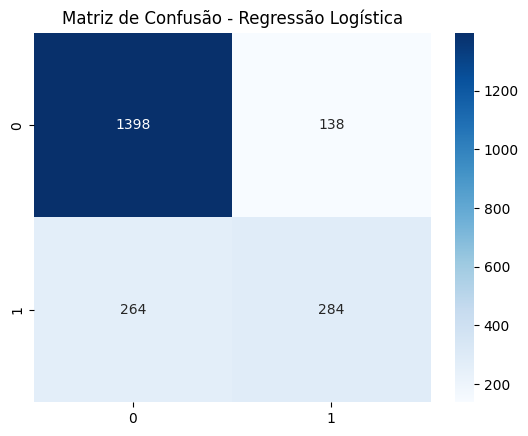

In [356]:
# Pipeline para Regressão Logística
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Treinar o modelo
lr_pipeline.fit(X_train, y_train)

# Previsões
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Avaliação
print("Regressão Logística - Métricas:")
print(classification_report(y_test, y_pred_lr))
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_lr))

# Matriz de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

Random Forest - Métricas:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1536
           1       0.61      0.49      0.54       548

    accuracy                           0.78      2084
   macro avg       0.72      0.69      0.70      2084
weighted avg       0.77      0.78      0.77      2084

Acurácia: 0.7826295585412668
AUC-ROC: 0.821396579417579


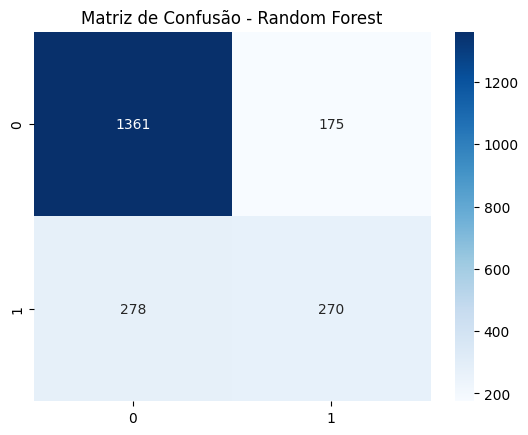

In [357]:
# Pipeline para Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

# Treinar o modelo
rf_pipeline.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Avaliação
print("Random Forest - Métricas:")
print(classification_report(y_test, y_pred_rf))
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_rf))

# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

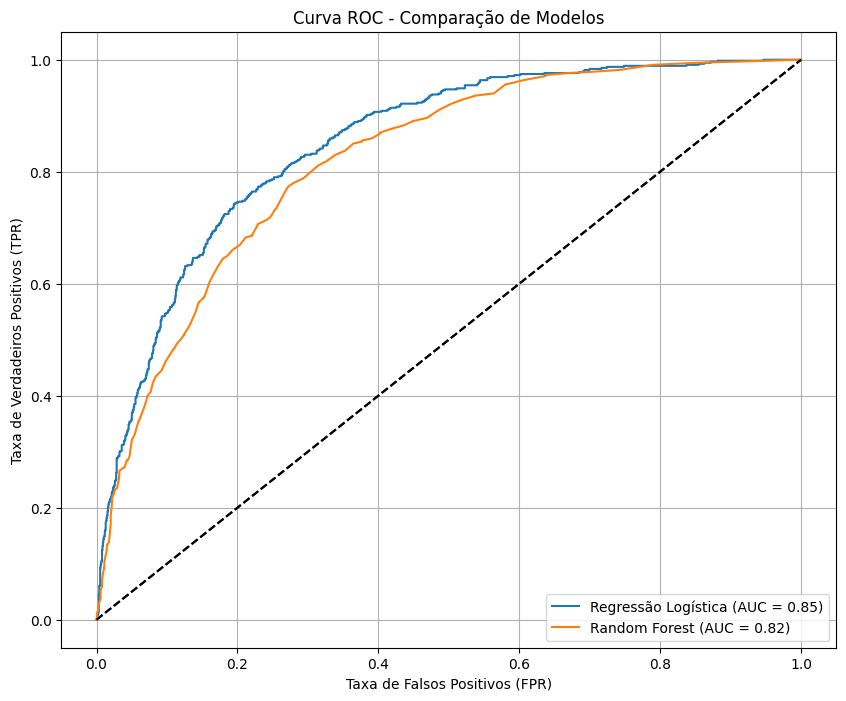


Métricas ROC-AUC:
Regressão Logística: 0.8504
Random Forest: 0.8214


In [360]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

## Função para plotar a curva ROC
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC - Comparação de Modelos')
    plt.legend(loc='lower right')
    plt.grid(True)

## Obter as probabilidades preditas de ambos os modelos
# Regressão Logística
y_pred_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Random Forest
y_pred_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

## Plotar as curvas ROC
plt.figure(figsize=(10, 8))
plot_roc_curve(y_test, y_pred_prob_lr, 'Regressão Logística')
plot_roc_curve(y_test, y_pred_prob_rf, 'Random Forest')

plt.show()

## Adicionando métricas no gráfico
print("\nMétricas ROC-AUC:")
print(f"Regressão Logística: {roc_auc_score(y_test, y_pred_prob_lr):.4f}")
print(f"Random Forest: {roc_auc_score(y_test, y_pred_prob_rf):.4f}")

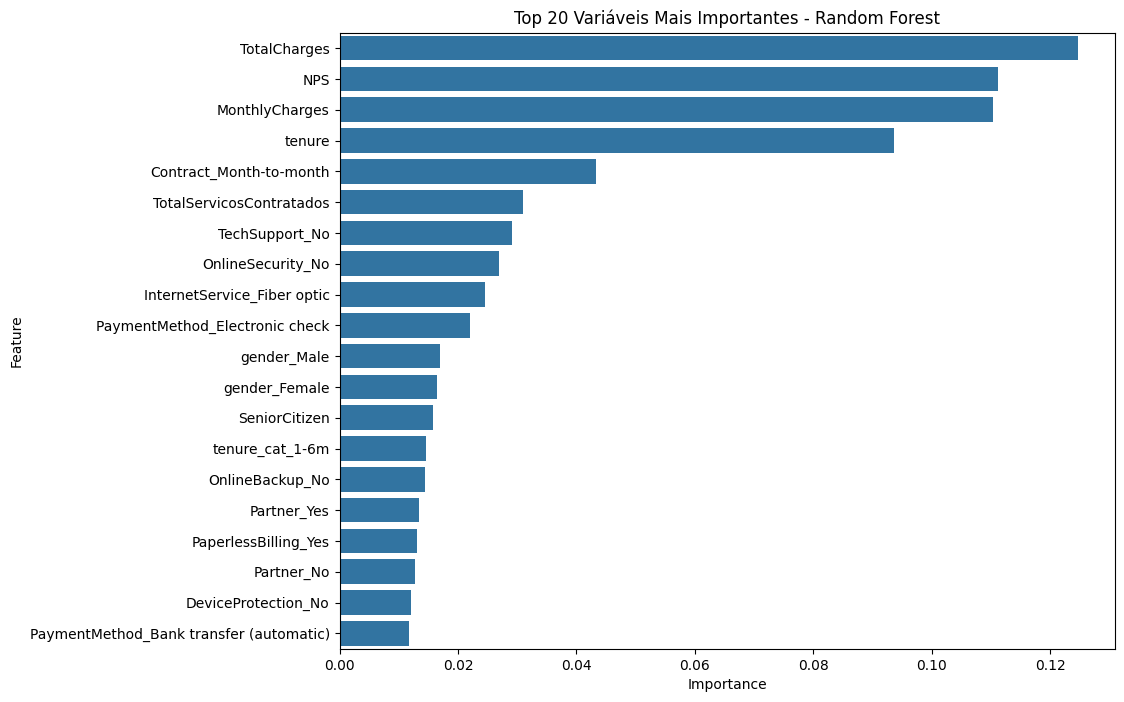

In [365]:
# Extrair nomes das features após one-hot encoding
onehot_columns = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(onehot_columns)

# Importância das variáveis
importances = rf_pipeline.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plotar as 20 mais importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Variáveis Mais Importantes - Random Forest')
plt.show()

## Análise do NPS

Nesta seção são analisados o NPS 

In [343]:
df_limpo['NPS'].describe()

count    6945.000000
mean        7.193233
std         2.631471
min         1.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: NPS, dtype: float64

In [344]:
# Função para Classificar o NPS
def classica_nps(score):
    if score >= 9:
        return 'Promotor'
    elif score <=  6:
        return 'Detrator'
    else:
        return 'Neutro'

In [345]:
df_limpo['Categorias_NPS'] = df_limpo['NPS'].apply(classica_nps)

counts = df_limpo['Categorias_NPS'].value_counts()

print(counts)


promotores = (counts.get('Promotor', 0) / len(df_limpo))*100
detratores = (counts.get('Detrator', 0) / len(df_limpo))*100

nps = promotores - detratores
print(round(nps,2))

Categorias_NPS
Promotor    2997
Detrator    2394
Neutro      1554
Name: count, dtype: int64
8.68


In [346]:
print("\n--- Distribuição NPS ---")
print(f"Promotores (9-10): {counts.get('Promotor', 0)} clientes ({promotores:.1f}%)")
print(f"Neutros (7-8): {counts.get('Neutro', 0)} clientes ({counts.get('Neutro', 0) / len(df_limpo) * 100:.1f}%)")
print(f"Detratores (1-6): {counts.get('Detrator', 0)} clientes ({detratores:.1f}%)")
print(f"\n>>> NPS Total: {nps:.1f} <<<")


--- Distribuição NPS ---
Promotores (9-10): 2997 clientes (43.2%)
Neutros (7-8): 1554 clientes (22.4%)
Detratores (1-6): 2394 clientes (34.5%)

>>> NPS Total: 8.7 <<<


Podemos notar que apesar de termos mais clientes do tipo **Promotores** e representam 43% , ainda há muito cliente do tipo **Detratores**o que reduiz o NPS total. Indicando um problema de insatisfação com os serviços prestados por parte da empresa. Então, faz-se necessário aprofundar nas causas destas  

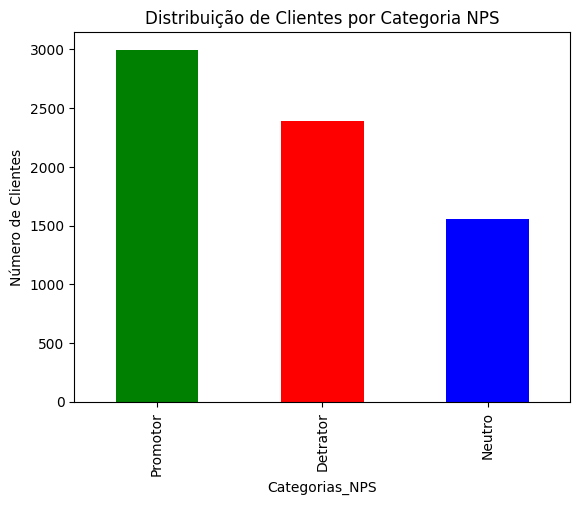

In [347]:
counts.plot(kind='bar', color=['green', 'red', 'blue']) #, color=['green', 'red', 'blue']
plt.title('Distribuição de Clientes por Categoria NPS')
plt.ylabel('Número de Clientes')
plt.show()

In [348]:
#sns.histplot(data=df_limpo, x='NPS', bins=10, kde=True)
#plt.title('Distribuição do NPS')
#plt.show()

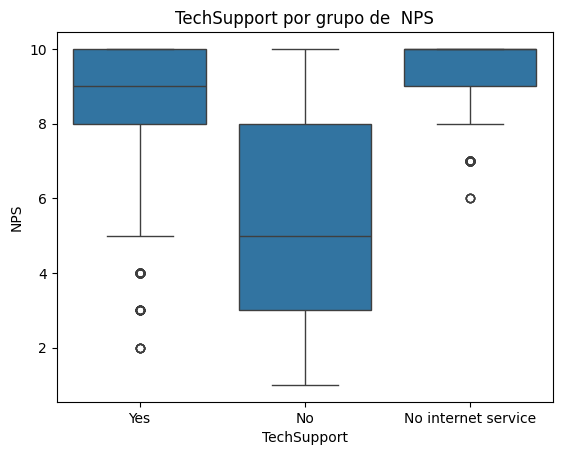

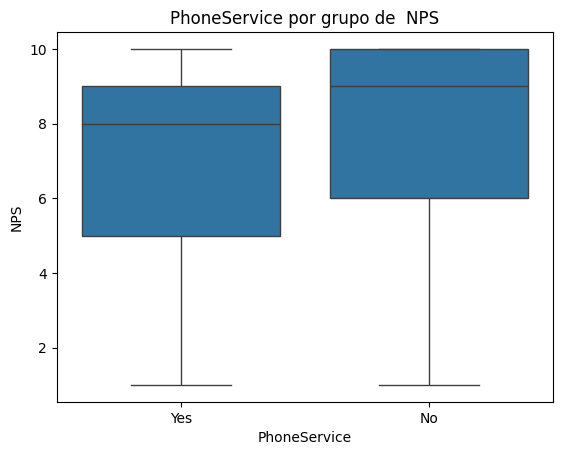

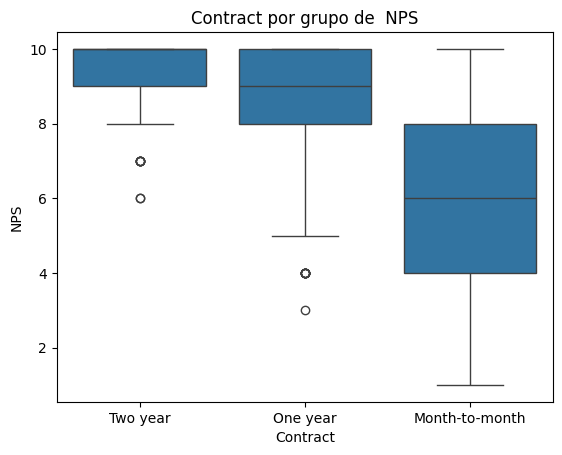

In [349]:
nome_cols = ['TechSupport','PhoneService', 'Contract' ]

for col in nome_cols:
    sns.boxplot(data=df_limpo, x=col, y='NPS')
    plt.title(f"{col} por grupo de  NPS")
    plt.show()

In [350]:
nps_score = (df_limpo[df_limpo['NPS'] >= 9].shape[0] / df_limpo.shape[0] * 100) - (df_limpo[df_limpo['NPS'] <= 6].shape[0] / df_limpo.shape[0] * 100)
print(f"NPS Agregado: {nps_score:.2f}")

NPS Agregado: 8.68


<Axes: xlabel='Churn', ylabel='TotalServicosContratados'>

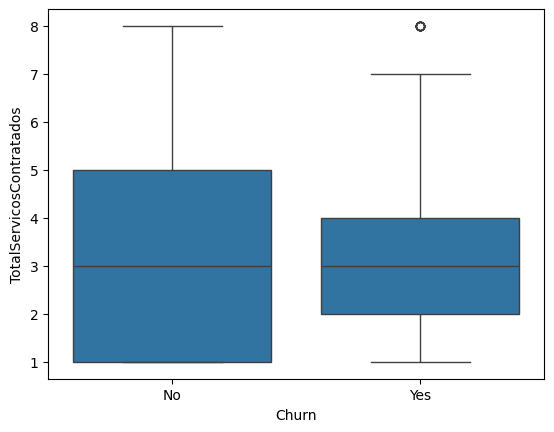

In [351]:
sns.boxplot(data=df_limpo, x='Churn', y='TotalServicosContratados')


<Axes: xlabel='TotalServicosContratados', ylabel='NPS'>

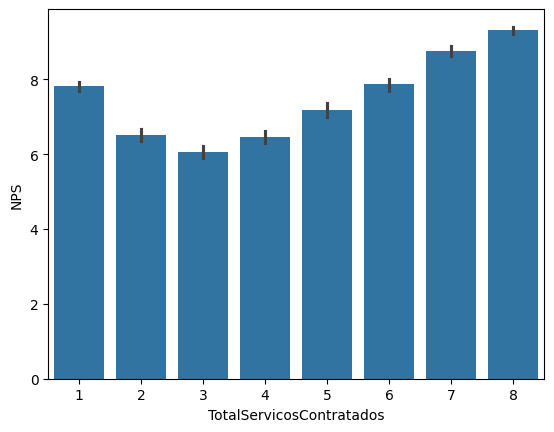

In [352]:
sns.barplot(data=df_limpo, x='TotalServicosContratados', y='NPS')


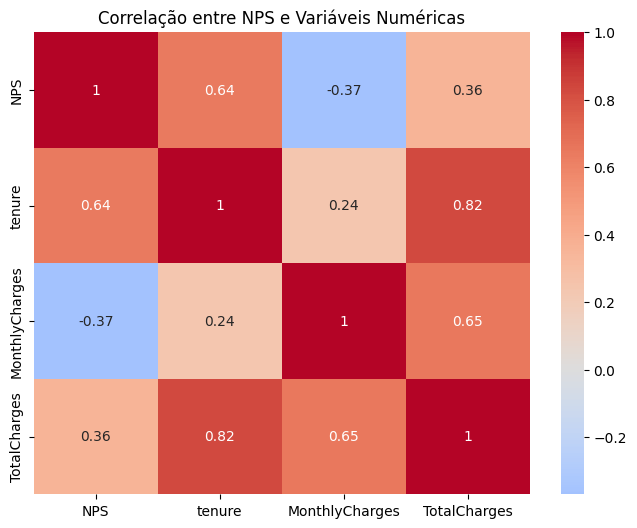

In [353]:
# Selecionar variáveis numéricas
numerical_vars = ['NPS', 'tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = df_limpo[numerical_vars].corr()

# Heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre NPS e Variáveis Numéricas')
plt.show()

A análise da matriz de correlação entre o NPS e as variáveis numéricas do conjunto de dados revela algumas relações importantes. O primeiro ponto a destacar é a correlação positiva moderada entre o NPS e o tempo de permanência (tenure), com valor de 0,64. Isso sugere que clientes com mais tempo de relacionamento tendem a apresentar maiores índices de satisfação, reforçando a importância da retenção de longo prazo para a melhoria do NPS.

Por outro lado, observa-se uma correlação negativa (-0,37) entre o NPS e os gastos mensais (MonthlyCharges). Esse resultado indica que clientes com cobranças mensais mais elevadas tendem a demonstrar menor satisfação, o que está alinhado com o alto **Churn** visto nesta região na análise anterior. Já o total gasto (TotalCharges) apresenta uma correlação positiva fraca (0,36), com o NPS, sinalizando que o acúmulo de gastos ao longo do tempo não reduz a satisfação. 

Além disso, é relevante notar a forte correlação entre algumas variáveis explicativas, como tenure e TotalCharges (0,82), reflexo natural de que o tempo de permanência impacta diretamente no valor acumulado

 Essa evidência sugere que estratégias voltadas à retenção de clientes e ao equilíbrio nos planos de cobrança podem ser determinantes para a melhoria do NPS.